# Enzyme Substrate Multi-Label Classification

**Context** <br>
Enzymes are known to act on molecules with structural similarities with their substrates. This behaviour is called promiscuity. Scientists working in drug discovery use this behaviour to target/design drugs to either block or promote biological actions. But, correct prediction of EC class(s) of substrates associated with enzymes has been a challenge in biology. Since there is no shortage of data, ML techniques can be employed to solve the aforementioned problem. Each row represents molecules that we need to classify their EC (Enzyme Commission) classes. The Enzyme Commission number (EC number) is a numerical classification scheme for enzymes, based on the chemical reactions they catalyze. It is stated that substrate molecules can belong to multiple EC classes at the same time, thus defining the multi-class classification problem. This problem is very crucial in fields like drug discovery and development, understanding enzyme function or metabolic analysis, and many more. 

**Goal** <br>
Predict the variables `EC1` and `EC2`

**Feature Description**:
- Id	Int	Id
- BertzCT	Float	Bertz complexity index
- Chi1	Float	1st order molecular connectivity index
- Chi1n	Float	Chi1 normalized
- Chi1v	Float	1st order molecular variance connectivity index
- Chi2n	Float	2nd order molecular connectivity index
- Chi2v	Float	2nd order molecular variance connectivity index
- Chi3v	Float	3rd order molecular variance connectivity index
- Chi4n	Float	4th order molecular connectivity index, normalized
- EState_VSA1	Float	Electrotopological state
- EState_VSA2	Float	Electrotopological state
- ExactMolWt	Float	Exact molecular weight
- FpDensityMorgan1	Float	Morgan fingerprint density for radius 1
- FpDensityMorgan2	Float	Morgan fingerprint density for radius 2
- FpDensityMorgan3	Float	Morgan fingerprint density for radius 3
- HallkierAlpha	Float	The Hall-Kier alpha value for a molecule
- HeavyAtomMolWt	Float	Molecular weight of heavy atoms only (excluding hydrogens)
- Kappa3	Float	Hall-Kier Kappa3 value
- MaxAbsEStateIndex	Float	Max Aboslute of E-state index
- MinEStateIndex	Float	Min of E-state index
- NumHeteroatoms	Int	Number of heteroatoms (atoms other than carbon and hydrogen)
- PEOE_VSA10	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA14	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA6	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA7	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- PEOE_VSA8	Float	Partial equalization of orbital electronegativity Van der Waals surface area contribution for a specific atom type
- SMR_VSA10	Float	Solvent-accessible surface area Van der Waals surface area contribution for a specific atom type
- SMR_VSA5	Float	Solvent-accessible surface area Van der Waals surface area contribution for a specific atom type
- SlogP_VSA3	Float	LogP-based surface area contribution
- VSA_EState9	Float	E-state fragment contribution for Van der Waals surface area calculation
- fr_COO	Int	Number of carboxyl (COO) functional groups, ranging 0-8
- fr_COO2	Int	Number of carboxyl (COO) functional groups, ranging 0-8
- EC1	Int	Binary feature, to be predicted label (Oxidoreductases)
- EC2	Int	Binary feature, to be predicted label (Transferases)
- EC3	Int	Binary feature of the EC class (Hydrolases)
- EC4	Int	Binary feature of the EC class (Lyases)
- EC5	Int	Binary feature of the EC class (Isomerases)
- EC6	Int	Binary feature of the EC class (Ligases)


**Resources**:
- [Kaggle Challenge](https://www.kaggle.com/competitions/playground-series-s3e18)
- [Dataset](https://www.kaggle.com/datasets/gopalns/ec-mixed-class)
- [Data Description](https://www.kaggle.com/competitions/playground-series-s3e18/discussion/419646#2324730)

In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143882 sha256=7d83c88b4adb053e02e9478d752c9f222c3e4a580eb83ccd1b1becd6239b131c
  Stored in directory: /root/.cache/pip/wheels/ae/63/93/5402c1a09c1868a59d0b05013484e07af97a9d7b3dbd5bd39a
Successfully built databricks-cli


In [2]:
# Import Standard Libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns

import mlflow

from pathlib import Path
from colorama import Style, Fore

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, LearningCurveDisplay, learning_curve, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

# Set Pandas Options
pd.set_option('display.max_columns', 500)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [4]:
# Define Colors
black = Style.BRIGHT + Fore.BLACK
magenta = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blue = Style.BRIGHT + Fore.BLUE
reset_colors = Style.RESET_ALL

# Read Data

In [5]:
# Switch flag for Kaggle Cloud
kaggle = True

# Switch flag for including original dataset
include_original_data = False

In [6]:
# Read training data
if kaggle:
    
    # Read data from Kaggle FS
    train_data = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv', index_col=0)
    test_data = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv', index_col=0)

else:
    
    # Define local data file paths
    train_data_file_path = Path(os.path.abspath('')).parents[1] / 'data' \
                                                                / 'S3E18_enzyme_substrate_multilabel_classification' \
                                                                / 'enzyme_substrate_multilabel_classification_train.csv'
    test_data_file_path = Path(os.path.abspath('')).parents[1] / 'data' \
                                                               / 'S3E18_enzyme_substrate_multilabel_classification' \
                                                               / 'enzyme_substrate_multilabel_classification_test.csv'
    # Read data with Pandas DataFrame
    train_data = pd.read_csv(train_data_file_path, index_col=0)
    test_data = pd.read_csv(test_data_file_path, index_col=0)

In [7]:
train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

# Exploratory Data Analysis (EDA)

## Shapes Information

In [9]:
# Print shapes information
print(f'{blue}Data Shapes:'
      f'{blue}\n- Train Data     -> {red}{train_data.shape}'
      f'{blue}\n- Test Data      -> {red}{test_data.shape}\n')

Data Shapes:
- Train Data     -> (14838, 37)
- Test Data      -> (9893, 31)



## Null Values Information

In [10]:
# Print null values information
print(f'{blue}Data Columns with Null Values:'
      f'{blue}\n- Train Data     -> {red}{train_data.isnull().any().sum()}'
      f'{blue}\n- Test Data      -> {red}{test_data.isnull().any().sum()}\n')

Data Columns with Null Values:
- Train Data     -> 0
- Test Data      -> 0



## Feature Distribution

### Numerical Feature Distribution

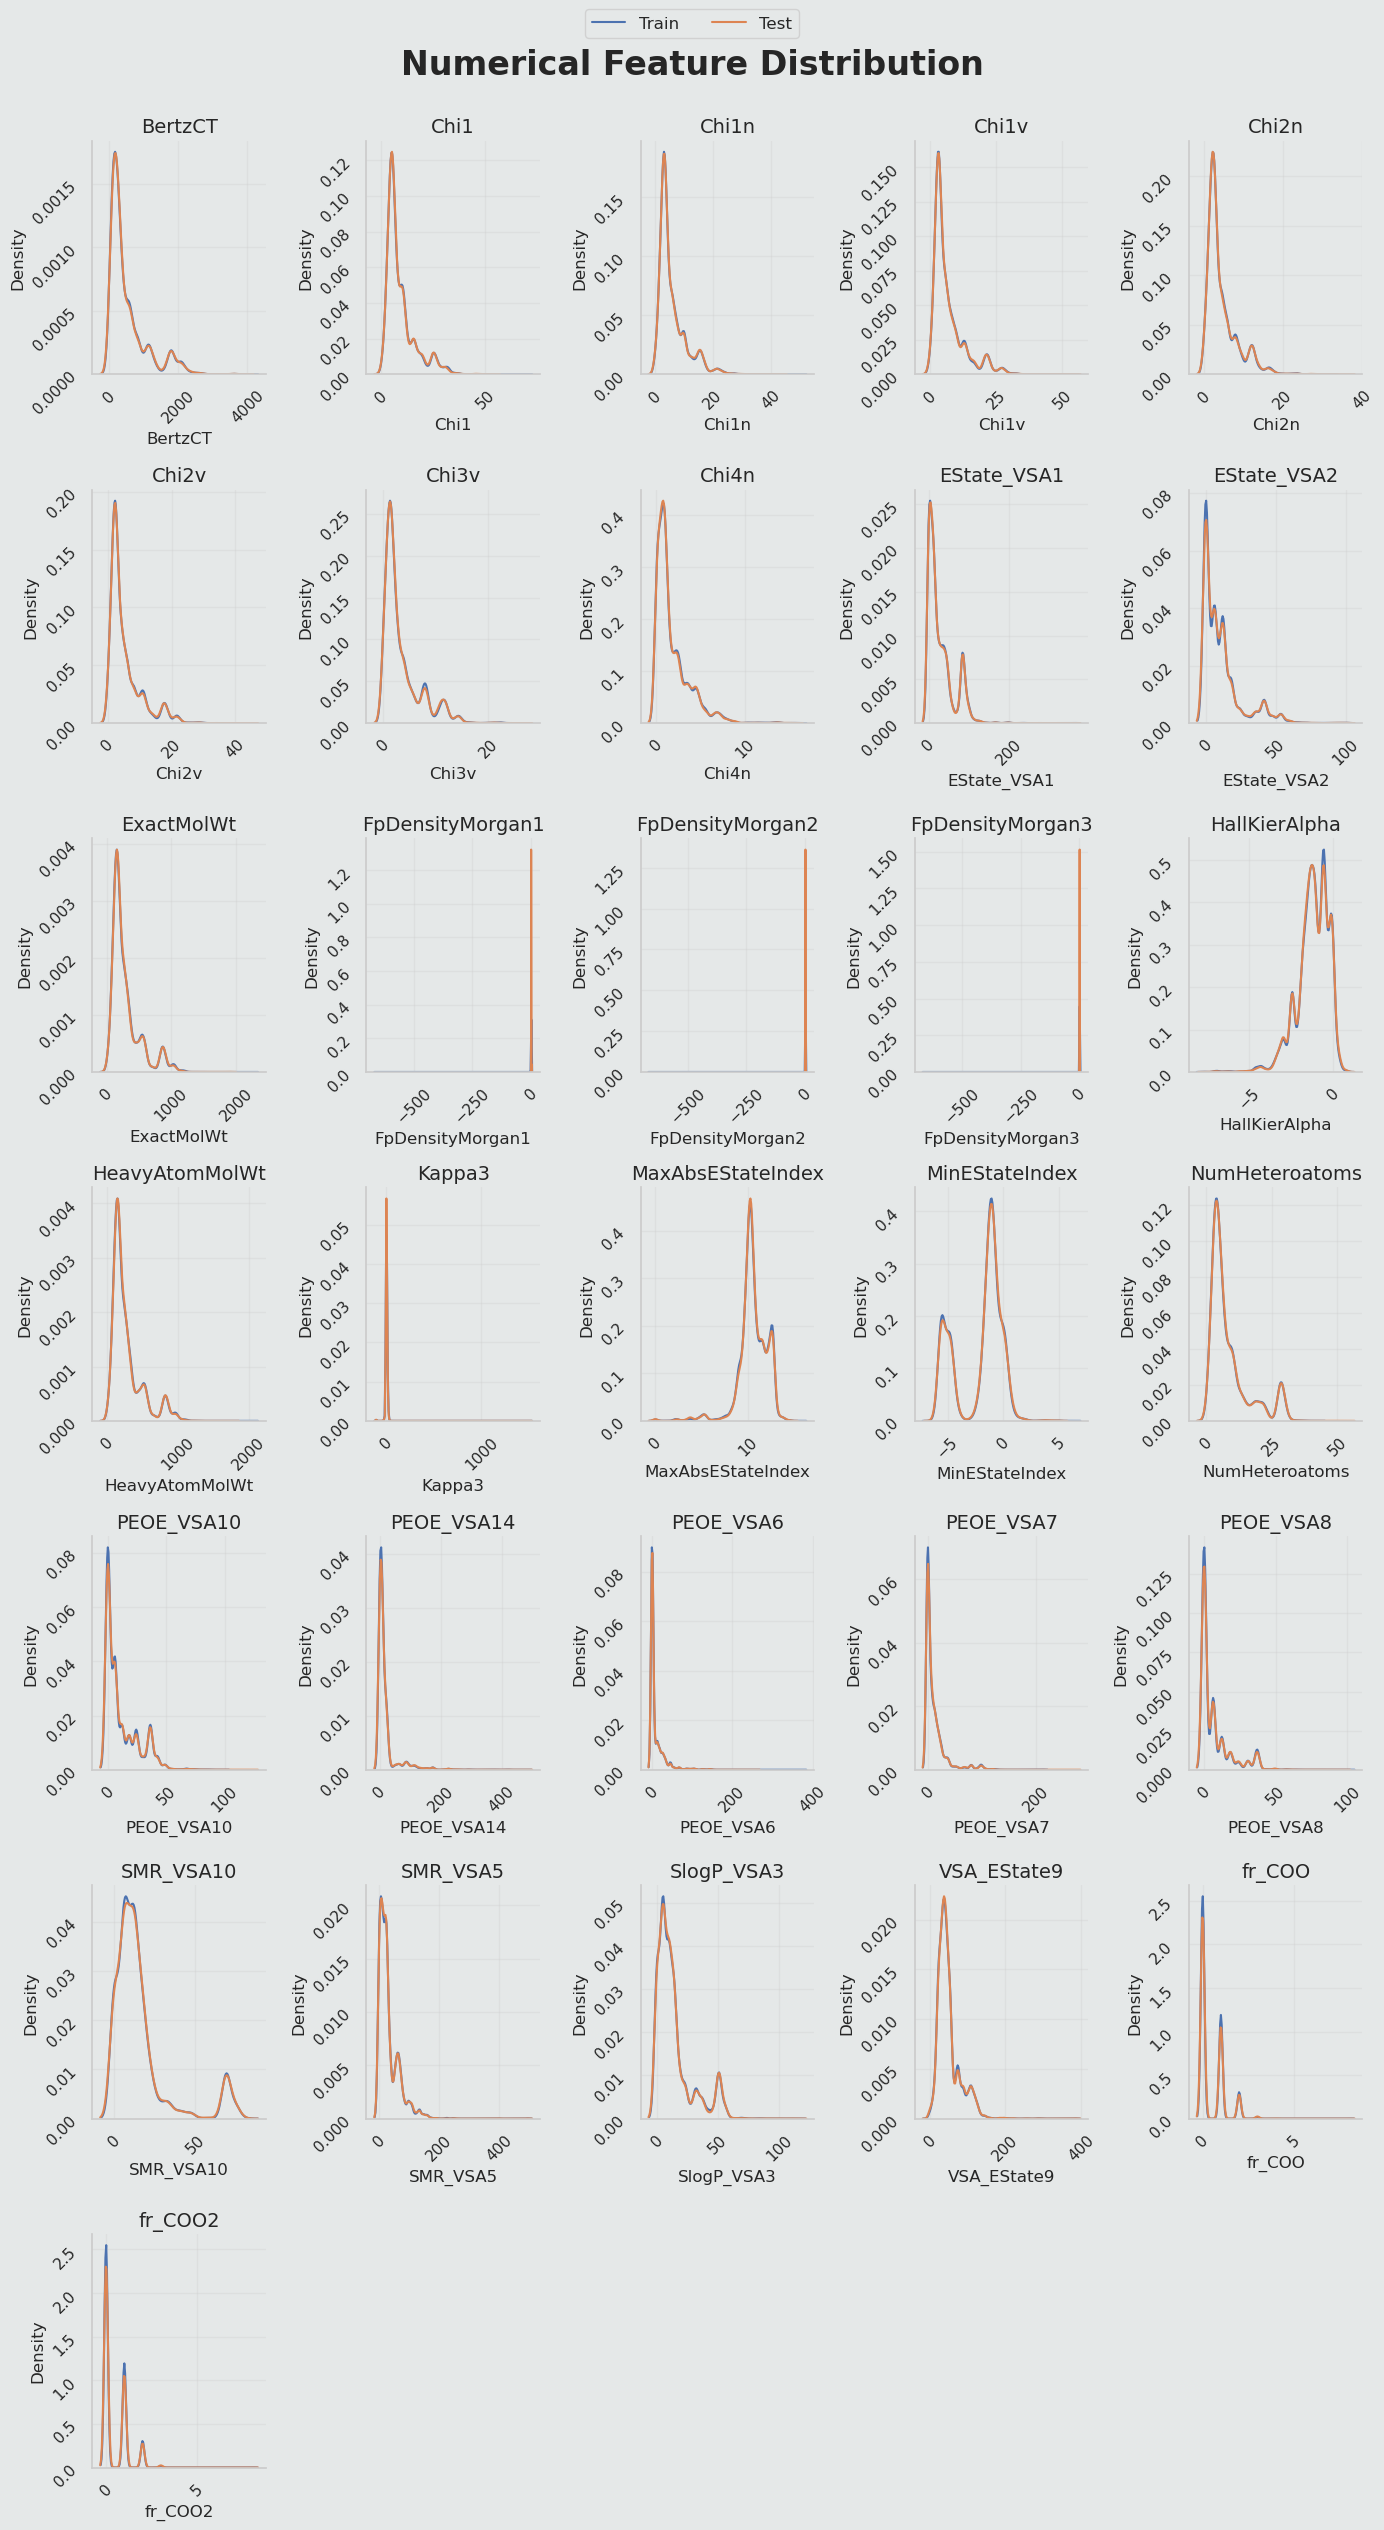

In [11]:
# Plot the KDE of each feature
figure, ax = plt.subplots(7, 5, figsize=(14, 25))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(train_data.columns[:-6]):
    
    # Plot data
    sns.kdeplot(data=train_data[column_name],
                label='Train',
                ax=ax[index])
    
    sns.kdeplot(data=test_data[column_name],
                label='Test',
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()
    
# Remove the empty subplots
figure.delaxes(ax[-4])
figure.delaxes(ax[-3])
figure.delaxes(ax[-2])
figure.delaxes(ax[-1])
    
# Set the legend
figure.legend(handles, 
              labels, 
              loc='center', 
              bbox_to_anchor=(0.5, 1.01), 
              fontsize=12,
              ncol=2)

# Set figure Title
figure.suptitle('Numerical Feature Distribution',
                fontweight='bold',
                y=1.00,
                fontsize=24)

plt.tight_layout()

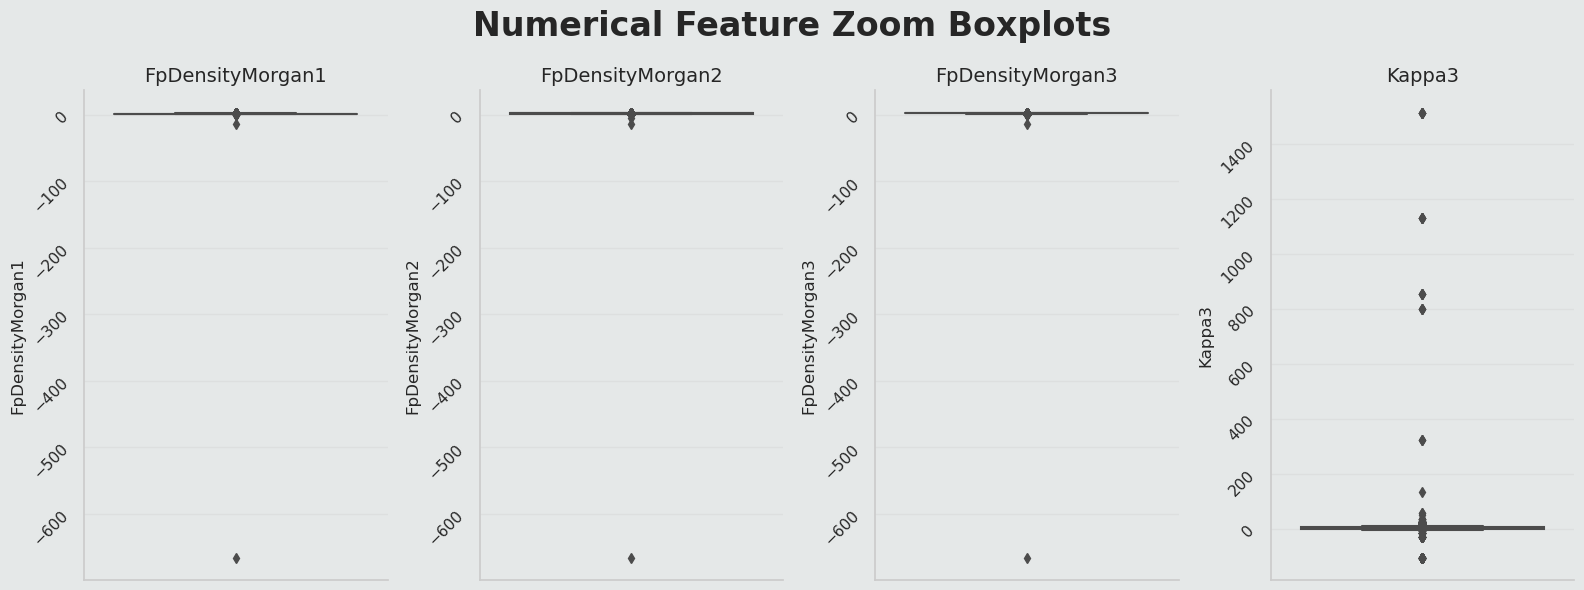

In [12]:
# Define the list of columns to have a closer look
raw_numerical_feature_zoom = ['FpDensityMorgan1', 
                              'FpDensityMorgan2', 
                              'FpDensityMorgan3', 
                              'Kappa3']

# Define figure and axes
figure, ax = plt.subplots(1, 4, figsize=(16, 6))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_feature_zoom):
    
    # Plot data
    sns.boxplot(data=train_data,
                y=column_name,
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

# Set figure Title
figure.suptitle('Numerical Feature Zoom Boxplots',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

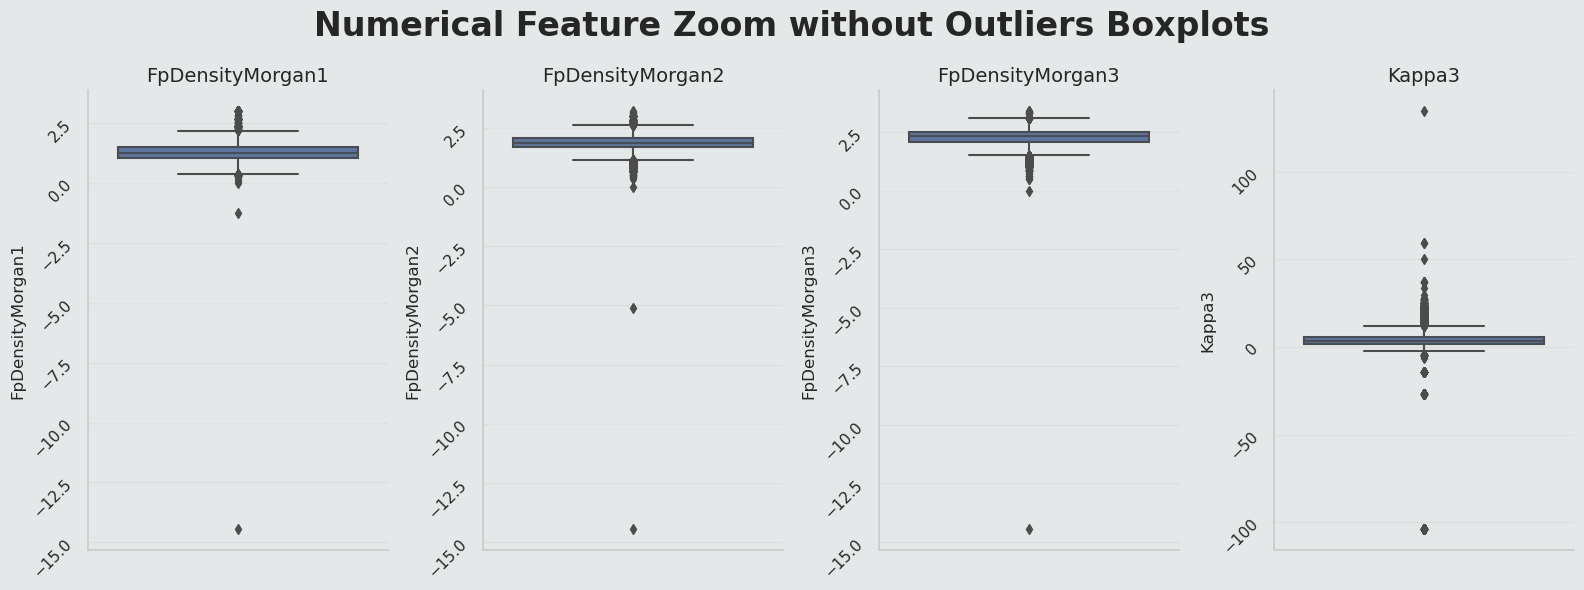

In [13]:
# Define the list of columns to have a closer look without outliers
raw_numerical_feature_zoom = ['FpDensityMorgan1', 
                              'FpDensityMorgan2', 
                              'FpDensityMorgan3', 
                              'Kappa3']

# Define filtering conditions
fp_density_morgan1_outlier_condition = train_data['FpDensityMorgan1'] >= -100
fp_density_morgan2_outlier_condition = train_data['FpDensityMorgan2'] >= -100
fp_density_morgan3_outlier_condition = train_data['FpDensityMorgan3'] >= -100
kappa_3_outlier_condition = train_data['Kappa3'] <= 200

# Define figure and axes
figure, ax = plt.subplots(1, 4, figsize=(16, 6))
ax = ax.flatten()

# Fetch the data to plot
for index, column_name in enumerate(raw_numerical_feature_zoom):
    
    # Plot data
    sns.boxplot(data=train_data.loc[fp_density_morgan1_outlier_condition & 
                                    fp_density_morgan2_outlier_condition & 
                                    fp_density_morgan3_outlier_condition & 
                                    kappa_3_outlier_condition],
                y=column_name,
                ax=ax[index])
    
    # Set subplot title
    ax[index].set_title(column_name, fontsize=14)
    
    # Set subplot tick rotation
    ax[index].tick_params(labelrotation=45)

# Set figure Title
figure.suptitle('Numerical Feature Zoom without Outliers Boxplots',
                fontweight='bold',
                fontsize=24)

plt.tight_layout()

- Features have different scales. We need Data Standardization
- Most of the features are right-skewed. We need Data Normalization
- The features `FpDensityMorgan1`, `FpDensityMorgan2`, `FpDensityMorgan3` and `Kappa3` have huge outliers. Need to remove them.

## Label Distribution

In [14]:
# Compute the Label Distribution with the occurences of each label
label_distribution = pd.DataFrame(train_data.iloc[:,-6:].sum(axis=0), columns=['Count'])

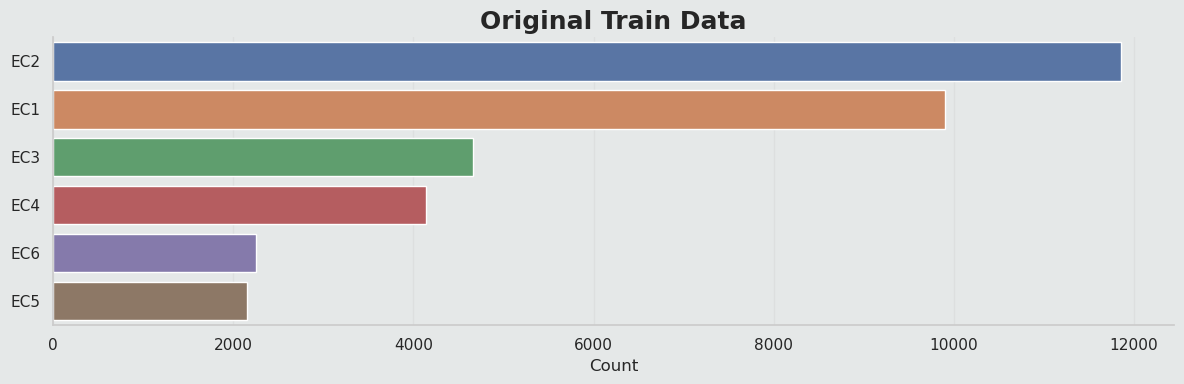

In [15]:
# Define figure and axes
figure, ax = plt.subplots(1, 1, figsize=(12, 4))

# Plot train data label countplot
sns.barplot(data=label_distribution, 
            x='Count',
            y=label_distribution.index, 
            order=label_distribution['Count'].sort_values(ascending=False).index)

# Set plot titles
ax.set_title('Original Train Data', 
             fontweight='bold',
             fontsize=18)
    
plt.tight_layout()

- Since we are only interested in `EC1` and `EC2`, there is not huge class imbalance.

## Conclusions

- Perform Data Standardization
- Perform Data Normalization
- Drop outliers from `FpDensityMorgan1`, `FpDensityMorgan2`, `FpDensityMorgan3` and `Kappa3`

# Data Preparation

## Data Cleaning

## Feature Engineering

In [16]:
class ComputeNumericalEngineeredFeatures(BaseEstimator, TransformerMixin):
    """
    Create a pre-defined set of engineered feature to the input DataFrame
    """
    
    def fit( self, X, y = None ):
        """
        This method is not required for this transformer
        """
        return self
    
    def transform(self, X):
        
        # Save column names
        self.feature_names = X.columns

        return X
    
    def get_feature_names_out(self, feature_names):
        """
        Retrieve the feature names
        """
        return [f'{col}' for col in self.feature_names]

## Data Pipeline

In [17]:
# Dictionary of data transformations to include
data_trasformations = {
    'numerical': {
        'feature_engineering': True,
        'standardization': True,
        'normalization': True
    }
}

### Numerical Data Pipeline

In [18]:
# Define numerical features
numerical_features = train_data.columns[:-6]

In [19]:
class Log1pTransformer(BaseEstimator, TransformerMixin):
    """
    Implements a Numpy.log1p transformation for Scikit-Learn Pipeline
    """
    
    def fit(self, X, y=None):
        """
        This method is not required for this transformer
        """
        return self
    
    def transform(self, X):
        """
        Transform the data X with a Numpy.log1p transformation
        """
        # Apply np.log1p to the input array
        return np.log1p(X, where=True)
    
    def get_feature_names_out(self, feature_names):
        """
        Retrieve the feature names
        """
        return [f'{col}' for col in feature_names]

In [20]:
# Define the numerical data pipeline steps based on data_trasformations['numerical']
numerical_data_pipeline_steps = []

if data_trasformations['numerical']['feature_engineering']:
    numerical_data_pipeline_steps.append(('feature_engineering', ComputeNumericalEngineeredFeatures()))
if data_trasformations['numerical']['standardization']:
    numerical_data_pipeline_steps.append(('standardization', MinMaxScaler()))
if data_trasformations['numerical']['normalization']:
    numerical_data_pipeline_steps.append(('normalization', Log1pTransformer()))

## Bundle the Data Pipeline

In [21]:
# Define the data preparation transformations
data_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Pipeline(numerical_data_pipeline_steps), numerical_features),
    ])

## Features and Label Definition

In [22]:
# Define the features to include
features = numerical_features

# Define the labels to include
labels = train_data.columns[-6:]

# Train & Test Split

In [23]:
# Define X and y for the training set
if include_original_data:
    X = pd.concat([train_data_cleaned[features], original_data_cleaned[features]], axis=0).reset_index(drop=True)
    y = np.ravel(pd.concat([train_data_cleaned[labels], original_data_cleaned[labels]], axis=0).reset_index(drop=True))
else:
    X = train_data[features]
    y = train_data[labels]

In [24]:
# Split training data into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=108)

# Model Training

In [25]:
# Set MLflow Experiment
mlflow_experiment_name = 'Enzyime Substrate Multilabel Classification'

# Create experiment or retrieve already existing experiment
try:
    mlflow_experiment_id = mlflow.create_experiment(name=mlflow_experiment_name)
except Exception as e:
    mlflow_experiment_id = mlflow.get_experiment_by_name(mlflow_experiment_name).experiment_id

In [26]:
# Define trained models
models = {}

# Define the used metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Initialize DataFrame of model performance
performance = pd.DataFrame(columns=metrics)

In [27]:
def train_model(model: any,
                pipeline_model_name: str,
                mlflow_run_name: str, 
                cv: any = None) -> any:
    """
    Train the passed 'model' instance
    
    Args:
        model: Any estimator instance with 'fit' and 'predict' functions
        pipeline_model_name: String model name for the Pipeline step
        mlflow_run_name: String Run name for the MLflow log
        cv: Any instance from sklearn.model_selection that implements a K-Folds Cross-Validator
    
    Returns:
        Fitted model
    """
    
    # Start MLflow Run
    with mlflow.start_run(experiment_id=mlflow_experiment_id, 
                          run_name=mlflow_run_name):
        
        print(f'{mlflow_run_name}\n')

        # Define the pipeline
        pipe = Pipeline([
            ('data_preprocessing', data_preprocessor),
            (pipeline_model_name, model)
        ])
        
        # Switch between Cross-Validation and Classic Training
        if not cv:

            # Train the pipeline
            pipe.fit(X_train, 
                     y_train)

            # Get predictions
            predictions = pipe.predict(X_test)
            
            # Get predictions probability
            prediction_probabilities = pipe.predict_proba(X_test)

            # Compute metrics
            accuracy = round(accuracy_score(y_test, predictions), 2)
            precision = round(precision_score(y_test, predictions, average='micro'), 2)
            recall = round(recall_score(y_test, predictions, average='micro'), 2)
            f1_score_value = round(f1_score(y_test, predictions, average='micro'), 2)
            roc_auc = round(roc_auc_score(y_test, prediction_probabilities, average='micro'), 2)
            
        else:
            
            # Initialise empty lists for metrics
            accuracy_list, precision_list, recall_list, f1_score_value_list, roc_auc_list = [], [], [], [], []
            
            # Fetch the folds
            for fold, (train_index, validation_index) in enumerate(cv.split(X, y)):
                                
                # Split the data
                X_train_fold = X.loc[train_index]
                X_validation_fold = X.loc[validation_index]
                y_train_fold = y[train_index]
                y_validation_fold = y[validation_index]
                
                # Train the pipeline
                pipe.fit(X_train_fold, 
                         y_train_fold)

                # Get predictions
                predictions_fold = pipe.predict(X_validation_fold)
                
                # Get predictions probability
                prediction_probabilities_fold = pipe.predict_proba(X_validation_fold)
                
                # Compute fold metrics
                accuracy_fold = round(accuracy_score(y_validation_fold, predictions_fold), 2)
                precision_fold = round(precision_score(y_validation_fold, predictions_fold, average='micro'), 2)
                recall_fold = round(recall_score(y_validation_fold, predictions_fold, average='micro'), 2)
                f1_score_value_fold = round(f1_score(y_validation_fold, predictions_fold, average='micro'), 2)
                roc_auc_fold = round(roc_auc_score(y_validation_fold, prediction_probabilities_fold, average='micro'), 2)
                
                print('---- Fold {} ----'.format(fold))
                print('Accuracy: {}'.format(accuracy_fold))
                print('Precision: {}'.format(precision_fold))
                print('Recall: {}'.format(recall_fold))
                print('F1 Score: {}'.format(f1_score_value_fold))
                print('ROC AUC: {}'.format(roc_auc_fold))
                print('\n')
                
                # Append mentrics to the corresponding list
                accuracy_list.append(accuracy_fold)
                precision_list.append(precision_fold)
                recall_list.append(recall_fold)
                f1_score_value_list.append(f1_score_value_fold)
                roc_auc_list.append(roc_auc_fold)
                
            # Compute metrics average
            accuracy = round(np.mean(accuracy_list), 2)
            precision = round(np.mean(mse_list), 2)
            recall = round(np.mean(mae_list), 2)
            f1_score_value = round(np.mean(mape_list), 2)
            roc_auc = round(np.mean(r2_score_value_list), 2)

        print('Accuracy: {}'.format(accuracy))
        print('Precision: {}'.format(precision))
        print('Recall: {}'.format(recall))
        print('F1 Score: {}'.format(f1_score_value))
        print('ROC AUC: {}'.format(roc_auc))
        print('\n')
        
        # Update 'performance' DataFrame
        performance.loc[mlflow_run_name] = [accuracy, precision, recall, f1_score_value, roc_auc]

        # Log model's evaluation metrics
        mlflow.log_metrics({'Accuracy': accuracy, 
                            'Precision': precision, 
                            'Recall': recall, 
                            'F1 Score': f1_score_value, 
                            'ROC AUC': roc_auc})

        # Log model's features
        mlflow.log_params({'Features': features, 
                           'Data Transformations': data_trasformations,
                           'Include Original Dataset': include_original_data})
        
        return pipe

## XGBoost

In [28]:
%%time

# Define the model
model_xgb = XGBClassifier()

# Define the pipeline model step name and the MLflow Run Name
pipe_model_step_name_xgb = 'xgboost'
mlflow_run_name_xgb = 'XGBoost'

# Train the model
pipe_xgb = train_model(model_xgb,
                       pipe_model_step_name_xgb,
                       mlflow_run_name_xgb)

# Add the trained model to the list of models to analyse
models[mlflow_run_name_xgb] = pipe_xgb

XGBoost

Accuracy: 0.24
Precision: 0.72
Recall: 0.64
F1 Score: 0.68
ROC AUC: 0.8


CPU times: user 31.5 s, sys: 175 ms, total: 31.7 s
Wall time: 8.12 s


# Model Explanability

## Model Comparison

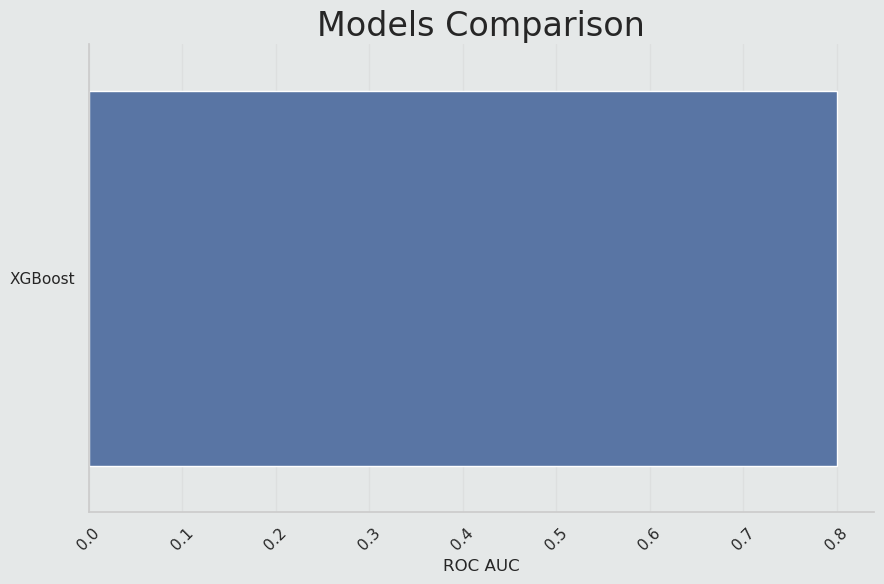

In [29]:
# Sort dataframe by the metric
performance.sort_values('ROC AUC', inplace=True)

# Create figure
figure = plt.figure(tight_layout=True, figsize=(9, 6))

# Plot models' metrics
ax = sns.barplot(data=performance, 
                 x='ROC AUC', 
                 y=performance.index.tolist())

# Set title
ax.set_title('Models Comparison', 
             fontsize=24)

# Set tick rotation
plt.xticks(rotation=45)

# Plot with tight layout
plt.tight_layout()

## Feature Importance

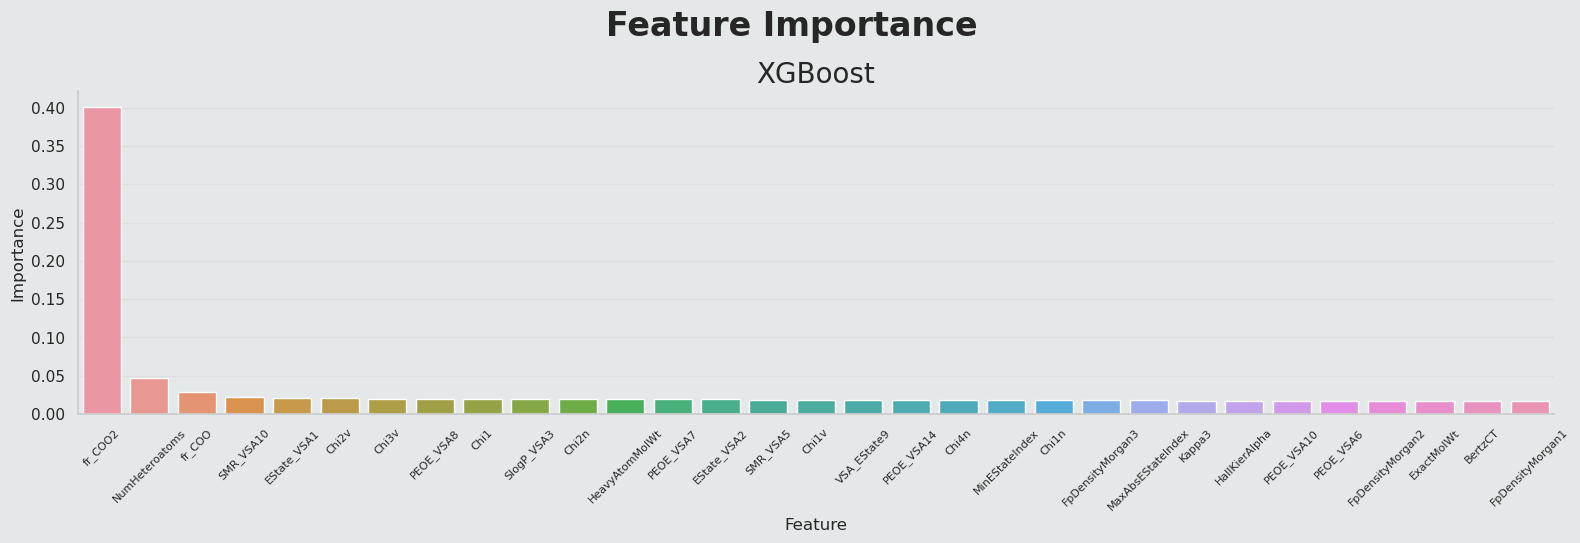

In [30]:
# Define figure and axes
figure, ax = plt.subplots(2, 1, figsize=(16, 9))
ax = ax.flatten()

# Fetch all the trained models
for index, model_name in enumerate(models.keys()):
    
    # Retrieve feature names
    feature_names = models[model_name].named_steps['data_preprocessing'].get_feature_names_out()
    
    # Refactor feature names to remove the ColumnTransformer prefix
    feature_names = [feature_name.split('__')[-1] for feature_name in feature_names]
    
    # Retrieve pipeline model's step name
    pipe_model_step_name = list(models[model_name].named_steps.keys())[-1]
    
    # Retrieve feature importances values
    try:
        # Tree-based models
        feautre_importance_values = models[model_name].named_steps[pipe_model_step_name].feature_importances_
    except:
        # Regression-based models
        feautre_importance_values = models[model_name].named_steps[pipe_model_step_name].coef_.reshape(-1,)
        
    
    
    # Compute the feature importance
    feature_importance = sorted(list(zip(feature_names,
                                         feautre_importance_values)),
                                key=lambda x: x[1], reverse=True)

    # Transform it into a DataFrame
    feature_importance_df = pd.DataFrame(feature_importance,
                                         columns= ['Feature', 'Importance'])    
    
    # Plot the feature importance
    sns.barplot(data=feature_importance_df,
               x='Feature',
               y='Importance', 
               ax=ax[index])

    # Set title
    ax[index].set_title(model_name, 
                 fontsize=20)

    # Refine x labels
    ax[index].set_xticklabels(feature_importance_df['Feature'],
                              fontsize=8,
                              rotation=45)

# Remove the empty subplots
figure.delaxes(ax[-1])
    
# Define figure title
figure.suptitle('Feature Importance',
                fontweight='bold',
                fontsize=24)

# Plot with tight layout
plt.tight_layout()

## Learning Curves

In [31]:
# Define Learning Curves Display parameters
learning_curves_display_paramters = {
    'X': X,
    'y': y,
    'cv': ShuffleSplit(n_splits=3, test_size=0.3, random_state=108),
    'train_sizes': np.linspace(0.1, 1.0, 8),
    'scoring': 'neg_root_mean_squared_error',
    'negate_score': True,
    'score_name': 'RMSE',
    'score_type': 'both',
    'verbose': 0,
    'line_kw': {'marker': 'o'},
    'std_display_style': 'fill_between',
}

/tmp/ipykernel_20/3386194791.py:17: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(X, where=True)
/tmp/ipykernel_20/3386194791.py:17: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(X, where=True)
/tmp/ipykernel_20/3386194791.py:17: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(X, where=True)
/tmp/ipykernel_20/3386194791.py:17: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(X, where=True)
/tmp/ipykernel_20/3386194791.py:17: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(X, where=True)


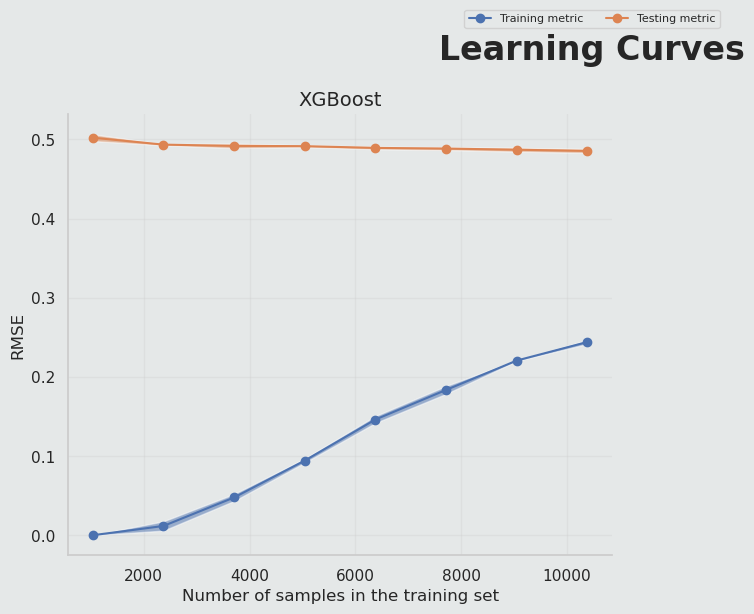

In [32]:
# Define figure and axes
figure, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flatten()

# Fetch all the trained models
for index, model_name in enumerate(models.keys()):

    # Plot the Learning Curve
    LearningCurveDisplay.from_estimator(models[model_name], 
                                        **learning_curves_display_paramters,
                                        ax=ax[index])
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()
    
    # Set the title
    ax[index].set_title(model_name, fontsize=14)
    
# Remove the empty subplots
figure.delaxes(ax[-1])
    
# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=8,
              ncol=2)

# Define figure title
figure.suptitle('Learning Curves',
                fontweight='bold',
                fontsize=24)
    
# Plot with tight layout
plt.tight_layout()

# Submission

In [33]:
# Generate predictions with test set
submission_predictions = pipe_xgb.predict_proba(test_data)

In [34]:
# Filter for EC1 and EC2
submission_predictions = submission_predictions[:, :2]

In [35]:
# Create submission DataFrame
submission = pd.DataFrame({'id': test_data.index, 'EC1': submission_predictions[:, 0], 'EC2': submission_predictions[:, 1]})

In [36]:
# Write CSV File
submission.to_csv('./submission.csv', index=False)